# Aim of using the model - Speaker Debates
# (See whether each speakers are taking about the Quantum computing - POSITIVELY, NEGATIVELY OR NEUTRALY)

In [2]:
!pip install assemblyai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.8 MB/s eta 0:00:00


#**Import the Libraries**

In [4]:
import assemblyai as aai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Load your saved model and vectorizer
import joblib
vectorizer = joblib.load('/content/drive/MyDrive/Models/tfidf_vectorizer.pkl')
# Load the Random Forest model(best model)
model = joblib.load('/content/drive/MyDrive/Models/random_forest_model.pkl')

In [5]:
import assemblyai as aai

# Replace with your API key
aai.settings.api_key = "0f6f958c291340dd8177ce08e317873c"

# URL of the file to transcribe
FILE_URL = "/content/drive/MyDrive/The_Future_of_Quantum_Computing_with_Michio_Kaku_Neil_deGrasse_Tyson_More.mp3"

# Initialize the transcriber
transcriber = aai.Transcriber()

# Create a transcription configuration with speaker diarization enabled
config = aai.TranscriptionConfig(speaker_labels=True) # Assuming speaker diarization is set via TranscriptionConfig

# Transcribe the file
transcript = transcriber.transcribe(FILE_URL, config=config)

# Check if transcription was successful
if transcript.status == aai.TranscriptStatus.error:
    print(transcript.error)
else:
    # Access the transcribed text with speaker labels
    for utterance in transcript.utterances:
        print(f"Speaker {utterance.speaker}: {utterance.text}")

Speaker A: SA welcome to StarTalk Live at the Beacons Theater, New York City. Tonight we're going to discuss something that will change the world. The world is already changing right now. It will change it even more in ways yet to be plumbed even by some of the most brilliant minds in the world. We're going to talk about quantum computing and all the ways that it will impact how we live, how we work and how we play, all the ways that that will collide with our culture. And while I have some expertise in that, nothing that could justify an entire evening here. We combed the universe to see who has the expertise in quantum computing, quantum physics and all that go with it. And we didn't have to look very far up the street. At City College of New York, Professor Michio Kak. You're a theoretical physicist, best selling author, futurist, and his most recent book is called Quantum how the Quantum Revolution will Change Everything came out just a few months ago and it was a New York Times be

# **Covert the text into a dataset**

In [12]:
import pandas as pd

# Create a list to store speaker utterances
utterances = []

# Iterate through the utterances and extract speaker and text
for utterance in transcript.utterances:
    utterances.append({
        "speaker": utterance.speaker,
        "text": utterance.text
    })

# Convert the list to a DataFrame
df = pd.DataFrame(utterances)

In [13]:
df.head()

,speaker,text
0,A,SA welcome to StarTalk Live at the Beacons The...
1,B,"Yeah, we're entering the fourth great industri..."
2,A,Did he say bitch? Was he good how you say it?
3,C,I like the way he said it.
4,B,He kind of turned me on.


# **Predict the Sentiments**

In [8]:
def predict_sentiment(text):
    # Check if text is a list and process each item separately
    if isinstance(text, list):
        return [predict_sentiment(item) for item in text]  # Recursively call for each item

    # Vectorize the input text using the loaded vectorizer
    text_vec = vectorizer.transform([text])

    # Predict the sentiment using the loaded model
    prediction = model.predict(text_vec)[0]

    return prediction

In [9]:
# Create a coloumn to store the sentiments
df["sentiment"] = df["text"].apply(predict_sentiment)

In [10]:
df.head()

,speaker,text,sentiment
0,A,SA welcome to StarTalk Live at the Beacons The...,Positive
1,B,"Yeah, we're entering the fourth great industri...",Positive
2,A,Did he say bitch? Was he good how you say it?,Positive
3,C,I like the way he said it.,Positive
4,B,He kind of turned me on.,Neutral


# **Plot the sentimen**

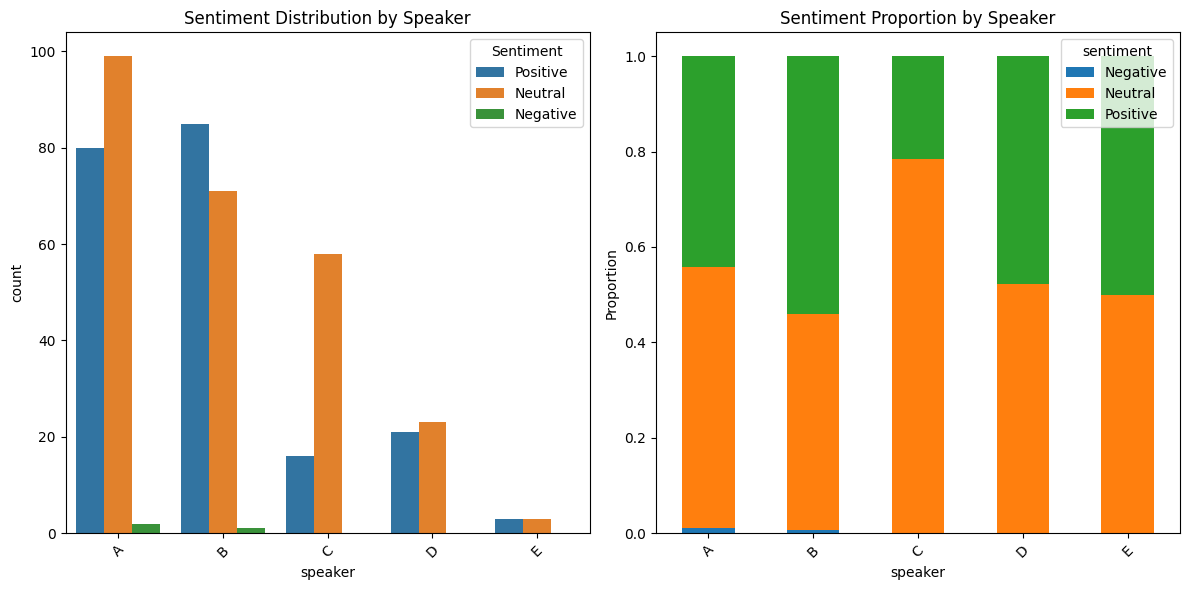

In [11]:
# 4. Visualization by Speaker
plt.figure(figsize=(12, 6))

# Plot 1: Sentiment Distribution by Speaker
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='speaker', hue='sentiment')
plt.title('Sentiment Distribution by Speaker')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

# Plot 2: Sentiment Proportion by Speaker
plt.subplot(1, 2, 2)
sentiment_prop = df.groupby(['speaker', 'sentiment']).size().unstack().apply(lambda x: x/x.sum(), axis=1)
sentiment_prop.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sentiment Proportion by Speaker')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

